In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load and extract audio features

folder_path = "C:/Users/Aishwarya/Dataset_wav"  # Replace with the actual path to the folder containing instrument subfolders
instrument_labels = os.listdir(folder_path)

audio_features = []
labels = []


max_length = 173  # Maximum length for padding/truncation

for label in instrument_labels:
    label_path = os.path.join(folder_path, label)
    audio_files = os.listdir(label_path)

    for audio_file in audio_files:
        file_path = os.path.join(label_path, audio_file)
        audio, sr = librosa.load(file_path, sr=None)

        # Extract audio features (MFCCs)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr)
        
        # Pad or truncate audio features to a fixed length
        mfccs_padded = pad_sequences([mfccs.T], maxlen=max_length, padding='post', truncating='post')
        
        audio_features.append(mfccs_padded[0])
        labels.append(label)

audio_features = np.array(audio_features)


In [2]:
audio_features

array([[[-530,    0,    0, ...,    0,    0,    0],
        [-530,    0,    0, ...,    0,    0,    0],
        [-512,   23,   18, ...,    1,    2,    1],
        ...,
        [-281,  102,   -5, ...,   12,    3,   19],
        [-300,  116,    1, ...,   12,   -1,   15],
        [-324,  133,    6, ...,   14,    0,   12]],

       [[-545,    0,    0, ...,    0,    0,    0],
        [-545,    0,    0, ...,    0,    0,    0],
        [-501,    9,   28, ...,    0,   -6,    4],
        ...,
        [-380,  139,    9, ...,    6,    3,    1],
        [-386,  135,    9, ...,    7,    3,    2],
        [-361,  120,  -11, ...,   -4,    7,    4]],

       [[-536,    0,    0, ...,    0,    0,    0],
        [-536,    0,    0, ...,    0,    0,    0],
        [-513,   24,   21, ...,    2,    0,    0],
        ...,
        [ -96,   35,  -49, ...,    7,    5,   12],
        [ -64,   79,  -47, ...,    7,    3,    5],
        [ -21,  101,  -34, ...,    8,    2,    8]],

       ...,

       [[-502,    0,    

In [3]:
X_train, X_val_test, y_train, y_val_test = train_test_split(audio_features, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


In [4]:
X_train

array([[[ -619,     0,     0, ...,     0,     0,     0],
        [ -533,    86,    27, ...,     7,     0,    -2],
        [ -420,   133,     3, ...,     2,     3,     1],
        ...,
        [ -253,    84,   -33, ...,     5,    -8,     8],
        [  -73,    93,   -32, ...,     1,   -21,     7],
        [  -28,   109,   -29, ...,     7,   -12,    15]],

       [[ -864,     0,     0, ...,     0,     0,     0],
        [ -783,    91,    47, ...,     7,     6,    -3],
        [ -677,   159,    20, ...,     5,     1,    -3],
        ...,
        [ -477,   185,   -83, ...,    -2,     7,     5],
        [ -485,   180,   -80, ...,    -2,     1,     1],
        [ -499,   179,   -72, ...,    -3,    -2,    -2]],

       [[-1107,    21,     6, ...,    -5,    -5,    -3],
        [ -817,   144,     4, ...,     0,    -6,   -11],
        [ -689,   177,     2, ...,     5,     0,    -3],
        ...,
        [ -689,   187,   -14, ...,     0,    -1,     0],
        [ -684,   188,   -12, ...,     1,    

In [5]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


In [6]:

# Step 3: Model Architecture (RNN)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

input_shape = X_train.shape[1:]

model = Sequential()
model.add(LSTM(64, input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


In [7]:

# Step 4: Model Training

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=50, validation_data=(X_val, y_val_encoded), verbose=1)

# Print details about each epoch
for epoch in range(len(history.history['loss'])):
    train_loss = history.history['loss'][epoch]
    train_acc = history.history['accuracy'][epoch]
    val_loss = history.history['val_loss'][epoch]
    val_acc = history.history['val_accuracy'][epoch]
    print(f"Epoch {epoch+1}/{len(history.history['loss'])} - loss: {train_loss:.4f} - accuracy: {train_acc:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}")


Epoch 1/50
55/55 [==============================] - 6s 69ms/step - loss: 2.9938 - accuracy: 0.2489 - val_loss: 2.7067 - val_accuracy: 0.2648
Epoch 2/50
55/55 [==============================] - 3s 57ms/step - loss: 2.3706 - accuracy: 0.3235 - val_loss: 2.4196 - val_accuracy: 0.3105
Epoch 3/50
55/55 [==============================] - 3s 57ms/step - loss: 2.0812 - accuracy: 0.3867 - val_loss: 2.1720 - val_accuracy: 0.3653
Epoch 4/50
55/55 [==============================] - 3s 57ms/step - loss: 1.8460 - accuracy: 0.4562 - val_loss: 1.9449 - val_accuracy: 0.4429
Epoch 5/50
55/55 [==============================] - 3s 57ms/step - loss: 1.5758 - accuracy: 0.5666 - val_loss: 1.7068 - val_accuracy: 0.4703
Epoch 6/50
55/55 [==============================] - 3s 57ms/step - loss: 1.3709 - accuracy: 0.6424 - val_loss: 1.5539 - val_accuracy: 0.5845
Epoch 7/50
55/55 [==============================] - 3s 58ms/step - loss: 1.1859 - accuracy: 0.7022 - val_loss: 1.3968 - val_accuracy: 0.6119
Epoch 8/50
55

In [8]:

score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7481685876846313
Test accuracy: 0.7727272510528564


7/7 [==============================] - 0s 37ms/step


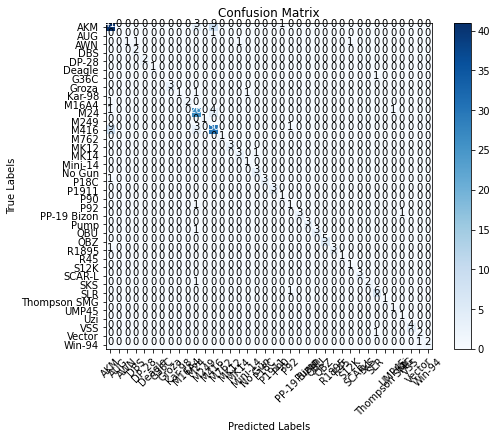

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Make predictions using your RNN model on the test data

# Assuming you have trained your RNN model and obtained predictions
y_pred = model.predict(X_test)  # Replace `rnn_model` with your trained RNN model

# Step 2: Convert predicted labels to string type

# If your RNN model predicts probabilities, you can convert them to class labels using argmax
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels to string type (assuming you have label encoder)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels)

# Step 3: Calculate the confusion matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Step 3: Visualize the confusion matrix

# Get the unique class labels
class_labels = np.unique(y_test)

# Create a figure and axes for the confusion matrix plot
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Create a heatmap for the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()

# Add tick marks for class labels on the axis
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add labels for each cell in the heatmap
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Show the confusion matrix plot
plt.show()


In [14]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# ... (previous code to define the model and train) ...

# Step 5: Predict and Evaluate

# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)

# Convert encoded labels back to original class labels
y_val_true_labels = label_encoder.inverse_transform(y_val_encoded)
y_val_pred_labels = label_encoder.inverse_transform(y_val_pred_labels)

# Step 6: Print Precision, Recall, and F1 Score

precision, recall, f1_score, _ = precision_recall_fscore_support(y_val_true_labels, y_val_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Step 7: Plot Confusion Matrix

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_val_true_labels, y_val_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


7/7 [==============================] - 0s 32ms/step
Precision: 0.8384970813053004
Recall: 0.821917808219178
F1 Score: 0.8198894557459988


C:\Users\Aishwarya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwarya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'sns' is not defined

<Figure size 720x576 with 0 Axes>

In [15]:
pip install tf-explain


     ---------------------------------------- 43.6/43.6 kB 1.1 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


7/7 [==============================] - 0s 38ms/step
Precision: 0.8384970813053004
Recall: 0.821917808219178
F1 Score: 0.8198894557459988


C:\Users\Aishwarya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwarya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


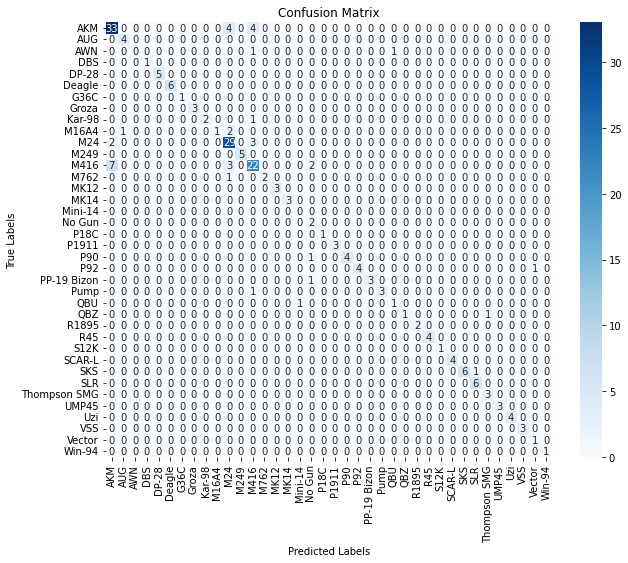

In [17]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for plotting the confusion matrix
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ... (previous code to load and preprocess the data, define the RNN model, and train the model) ...

# Step 5: Predict and Evaluate

# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)

# Convert encoded labels back to original class labels
y_val_true_labels = label_encoder.inverse_transform(y_val_encoded)
y_val_pred_labels = label_encoder.inverse_transform(y_val_pred_labels)

# Step 6: Print Precision, Recall, and F1 Score

precision, recall, f1_score, _ = precision_recall_fscore_support(y_val_true_labels, y_val_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Step 7: Plot Confusion Matrix

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_val_true_labels, y_val_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [19]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.display import Audio

# Assuming you have loaded and preprocessed your data and trained your RNN model

# Step 1: Load a random audio sample from the test set
random_index = random.randint(0, len(X_test) - 1)
random_audio = X_test[random_index]

# Step 2: Preprocess the audio sample to match the model's input shape
input_sequence = random_audio.reshape(1, X_test.shape[1], X_test.shape[2])

# Step 3: Make predictions using your trained RNN model
  # Replace with the path to your trained model
model = model

y_pred = model.predict(input_sequence)
y_pred_label = np.argmax(y_pred, axis=1)

# Step 4: Convert the predicted label to the corresponding class name
predicted_class_name = label_encoder.inverse_transform(y_pred_label)[0]

# Step 5: Play the audio
print(f"Predicted Class: {predicted_class_name}")
Audio(input_sequence[0], rate=sr)


1/1 [==============================] - 0s 39ms/step
Predicted Class: M24


Epoch 1/50
55/55 [==============================] - 5s 90ms/step - loss: 0.1328 - accuracy: 0.9624 - val_loss: 0.8114 - val_accuracy: 0.8311
Epoch 2/50
55/55 [==============================] - 4s 81ms/step - loss: 0.1298 - accuracy: 0.9647 - val_loss: 0.7912 - val_accuracy: 0.8128
Epoch 3/50
55/55 [==============================] - 4s 81ms/step - loss: 0.1274 - accuracy: 0.9653 - val_loss: 0.7785 - val_accuracy: 0.8037
Epoch 4/50
55/55 [==============================] - 4s 77ms/step - loss: 0.1264 - accuracy: 0.9624 - val_loss: 0.7846 - val_accuracy: 0.8128
Epoch 5/50
55/55 [==============================] - 4s 79ms/step - loss: 0.1226 - accuracy: 0.9653 - val_loss: 0.8470 - val_accuracy: 0.8219
Epoch 6/50
55/55 [==============================] - 4s 76ms/step - loss: 0.1791 - accuracy: 0.9482 - val_loss: 1.0556 - val_accuracy: 0.7717
Epoch 7/50
55/55 [==============================] - 4s 78ms/step - loss: 0.3124 - accuracy: 0.8986 - val_loss: 0.8555 - val_accuracy: 0.8037
Epoch 8/50
55

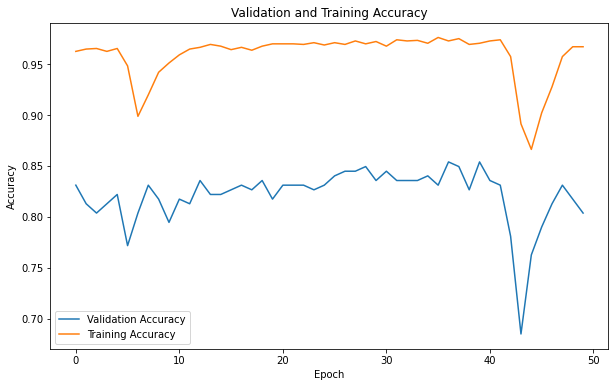

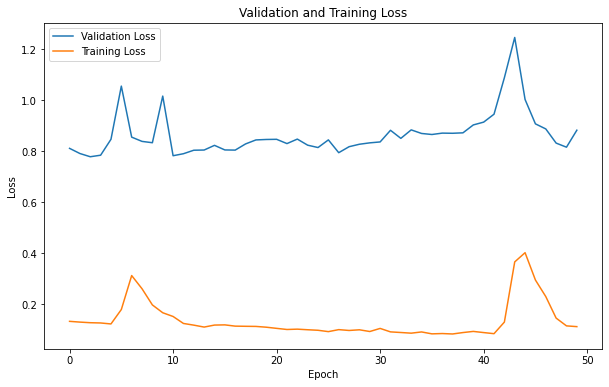

In [22]:
# ... (previous code to define the RNN model and compile the model) ...

# Step 4: Model Training
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=50, validation_data=(X_val, y_val_encoded), verbose=1)

# ... (rest of the code to make predictions, play audio, and plot spectrogram) ...

# Plot Validation and Test Curves for Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation and Training Accuracy')
plt.show()

# Plot Validation and Test Curves for Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation and Training Loss')
plt.show()
